<a href="https://colab.research.google.com/github/leandrominer85/Deteccao_de_Fraude_em_Cartoes_de_Credito/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

<p align=center>
<img src="https://media.gettyimages.com/photos/phishing-credit-card-for-information-picture-id542736893?s=2048x2048" width="60%"></p>


# Introdução

Esse projeto é parte do curso [Data Science na Prática](https://sigmoidal.ai/) e tem como intuito demonstrar uma abordagem introdutória ao aprendizado de máquina.

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.


Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import LinearSVC
import scikitplot as skplt
import datetime
import numpy as np
import warnings

In [ ]:
# Estilizando o seaborn
sns.set_style('dark')

# Não mostrar mensagens de alerta "chatas"
warnings.filterwarnings('ignore')

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

In [ ]:
#Verificando as 5 primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Qual o tamanho do dataset?
print('O dataset tem {} linhas'.format(len(df)))
print('O dataset tem {} colunas'.format(df.shape[1]))

O dataset tem 284807 linhas
O dataset tem 31 colunas


In [ ]:
# Conjunto de estatísticas descritivas
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Verificando a presença de dados ausentes
df.isnull().sum().sort_values(ascending=False)/len(df)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [ ]:
# Quais os tipos de dado?
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Temos um dataset com todas as variáveis numéricas e sem nenhum dado ausente. A maior parte das variáveis está normalizada devido ao processo de PCA. Apenas as variáveis Time e Amount não estão normalizadas.
A variável Class é a variável alvo e binária (fraude ou não).

### Verificação do balanceamento do dataset

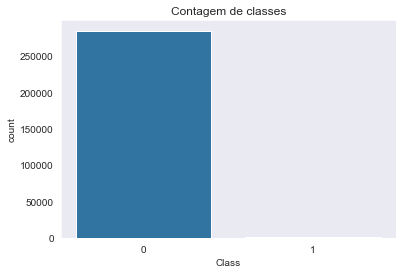

In [ ]:
#Verificando o balanceamento do dataset com relação à variável alvo (Class)
fig, ax = plt.subplots()
sns.countplot(data=df,x="Class")
ax.set_title("Contagem de classes")
plt.plot();

In [ ]:
print("A fraude representa {:.4f}% das observações".format(len(df[df["Class"]==1])/len(df)*100))

A fraude representa 0.1727% das observações


Temos portanto um dataset altamente desbalanceado

### Analisando a variável tempo

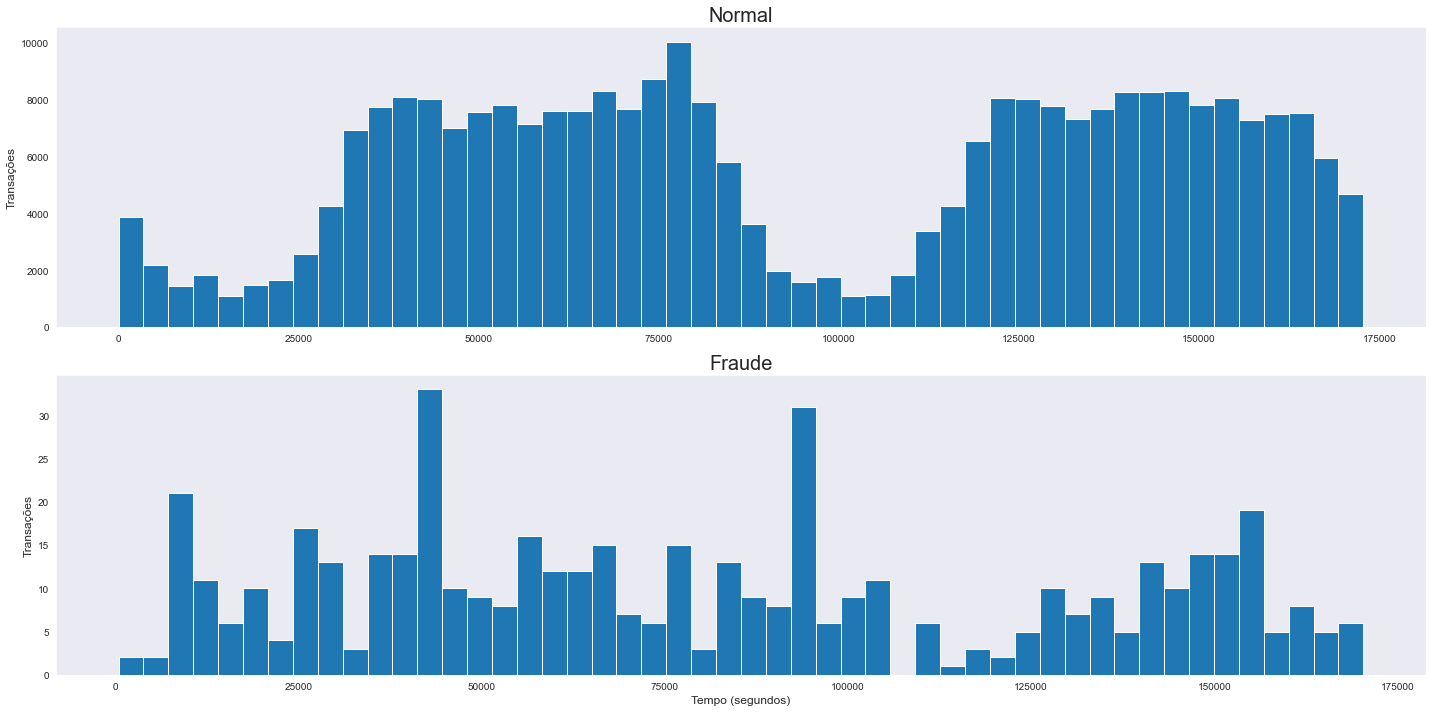

In [ ]:
# Analisando a distribuição da variável tempo para ambas categorias de fraude
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(20,10))
ax[0].hist(df['Time'][df['Class']==0], bins=50) 
ax[0].set_title("Normal",fontsize=20)

ax[0].set_ylabel("Transações",fontsize=12)

ax[1].set_title("Fraude", fontsize=20)
ax[1].hist(df['Time'][df['Class']==1],bins=50)

plt.xlabel("Tempo (segundos)", fontsize=12)

ax[1].set_ylabel("Transações", fontsize=12)
plt.tight_layout();

In [ ]:
# Quanto tempo decorreu da primeira transação para a última?
str(datetime.timedelta(seconds=df.Time.max()))


'1 day, 23:59:52'

A variável tempo não permite inferir diretamente a hora exata - pois as transações tem como linha de base a primeira entrada do dataset.
O tempo total decorrido é próximo de dois dias. Portanto, as transações normais parecem obedecer um padrão de picos e vales que provavelmente corresponde ao ciclo diário.
No caso das transações fraudulentas é difícil inferir algo, mas é possível averiguar algumas concentrações (picos) no tempo.

### Analisando a variável Amount

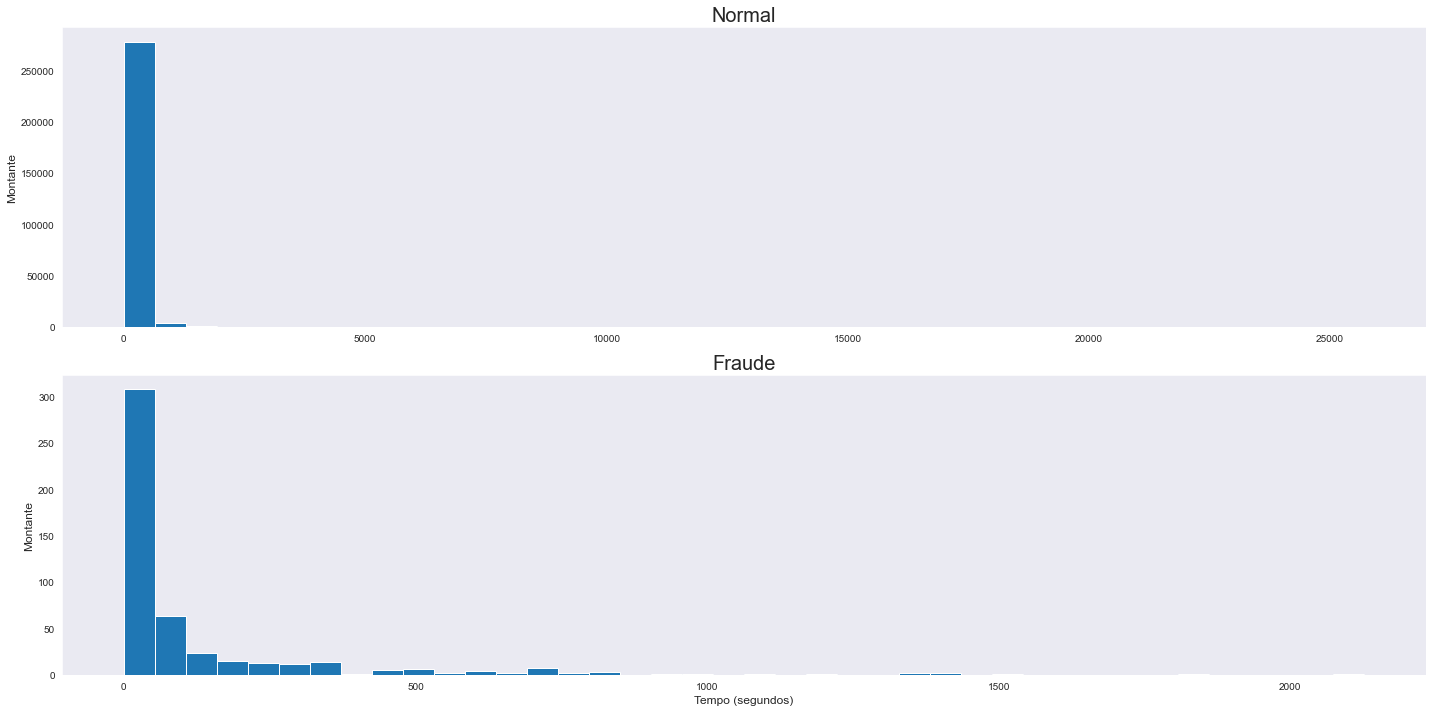

In [ ]:
# Analisando a distribuição da variável Amount para ambas categorias de fraude
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(20,10) )
ax[0].hist(df['Amount'][df['Class']==0], bins=40) 
ax[0].set_title("Normal", fontsize=20)

ax[0].set_ylabel("Montante" ,fontsize=12)

ax[1].set_title("Fraude", fontsize=20)
ax[1].hist(df['Amount'][df['Class']==1],bins=40)

plt.xlabel("Tempo (segundos)",fontsize=12)

ax[1].set_ylabel("Montante",fontsize=12)
plt.tight_layout();

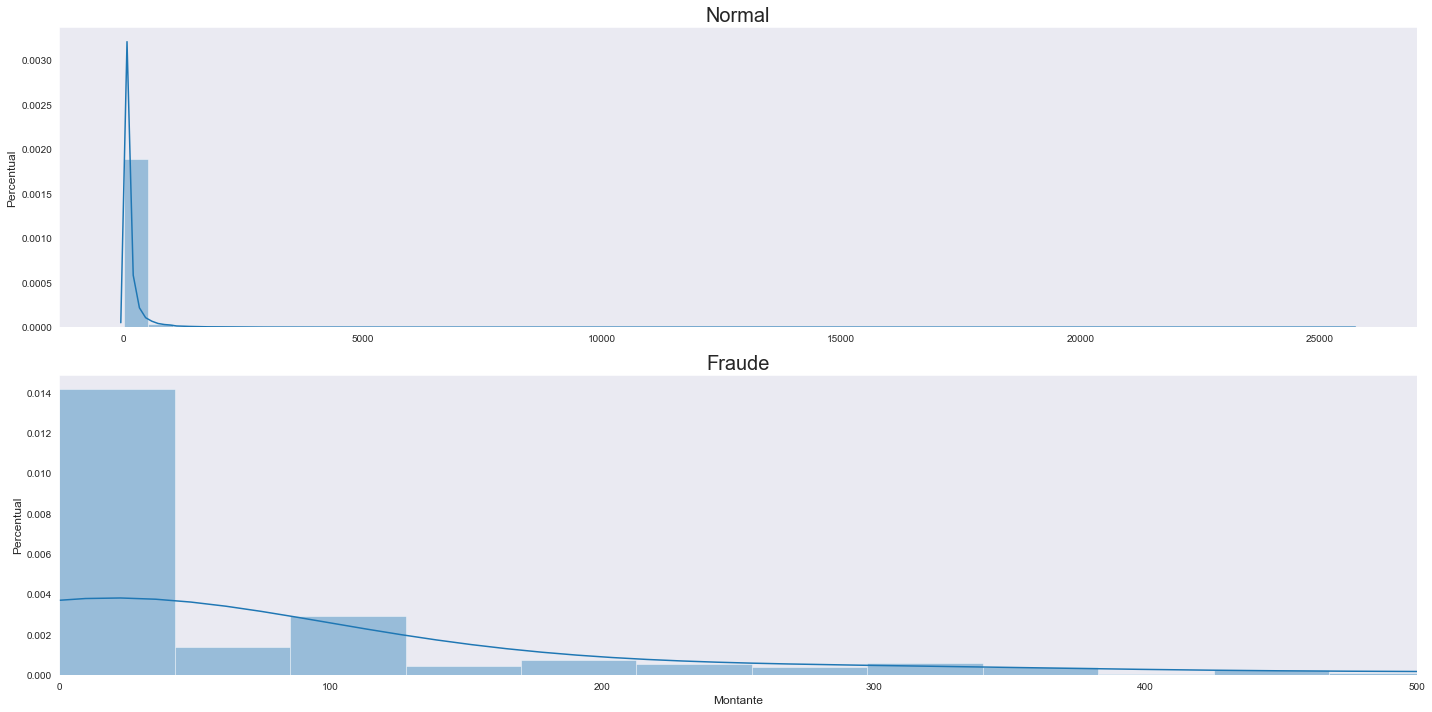

In [ ]:
# Analisando a distribuição da variável Amount para ambas categorias de fraude
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(20,10) )
sns.distplot(df['Amount'][df['Class']==0], ax=ax[0])
ax[0].set_title("Normal", fontsize=20)
ax[0].set_xlabel("")
ax[0].set_ylabel("Percentual" ,fontsize=12)

ax[1].set_title("Fraude", fontsize=20)
sns.distplot(df['Amount'][df['Class']==1],ax=ax[1])



ax[1].set_ylabel("Percentual",fontsize=12)
plt.xlabel("Montante",fontsize=12)
plt.xlim(0, 500)
plt.tight_layout();

O montante das transações normais se concentra em transações de valores mais baixos. Para as transações fraudulentas essa distribuição é menos concentrada. Vamos verificar mais a fundo essa questão:

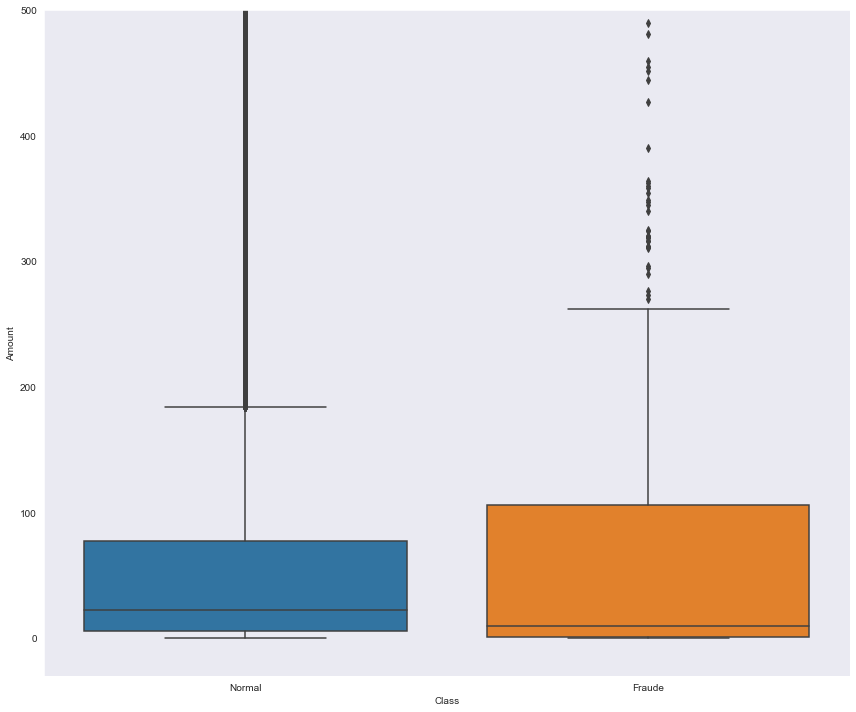

In [ ]:
# Boxplot da distribuição do montante por classe
fig, ax = plt.subplots( figsize=(12,10) )
sns.boxplot(y='Amount', data=df,x='Class')
plt.ylim([-30,500])
plt.xticks([0,1],['Normal',"Fraude"])
plt.tight_layout();

O grosso das transações, tanto normais quanto fraudulentas, se concentram em valores relativamente baixos - com o limite do terceiro quartil para as fraudulentas apresentando um valor próximo de 100.
A presença de Outliers dificulta a visualização dessa variável, mas os mesmo serão mantidos na análise pois representam uma importante fonte de dados.

In [ ]:
# Criando um dataframe com os gastos por faixa: 
df_faixa = df[["Amount",'Class']]
df_faixa['faixa'] = np.nan
df_faixa.loc[df_faixa['Amount'] == 0, 'faixa'] = ' 1 - Sem movimentação'
df_faixa.loc[(df_faixa['Amount'] > 0) & (df_faixa['Amount'] <= 37.5 ), 'faixa']= '2 - entre 0 e 37.5'
df_faixa.loc[(df_faixa['Amount']  > 37.5) & (df_faixa['Amount'] <= 937) , 'faixa' ] = '3 - entre 37.5  e 75'
df_faixa.loc[(df_faixa['Amount']  > 75) & (df_faixa['Amount'] <= 150) , 'faixa' ] = '4 - entre 75  e 150'
df_faixa.loc[df_faixa['Amount'] > 150, 'faixa'] = '5 - acima de 150'

In [ ]:
# Totais por faixa de movimentação por classe
grouped = df_faixa.groupby(['faixa','Class']).agg(['count'])
grouped

Amount
                              count
faixa                 Class        
 1 - Sem movimentação 0        1798
                      1          27
2 - entre 0 e 37.5    0      169417
                      1         262
3 - entre 37.5  e 75  0       40588
                      1          27
4 - entre 75  e 150   0       33194
                      1          77
5 - acima de 150      0       39318
                      1          99

In [ ]:
# Percentual do total da faixa de movimentação por classe
df_faixa.groupby(['faixa','Class']).agg({"Amount" : "count"})\
.groupby(level=1).apply(lambda x: 100*x/len(df))

Amount
faixa                 Class           
 1 - Sem movimentação 0       0.631305
                      1       0.009480
2 - entre 0 e 37.5    0      59.484844
                      1       0.091992
3 - entre 37.5  e 75  0      14.251054
                      1       0.009480
4 - entre 75  e 150   0      11.654910
                      1       0.027036
5 - acima de 150      0      13.805138
                      1       0.034760

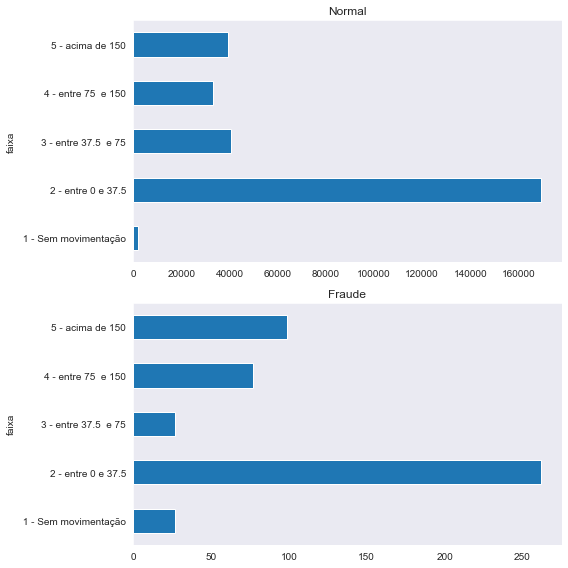

In [ ]:
# Análise gráfica das faixas de movimentação
fig, ax = plt.subplots(nrows=2,ncols=1 ,figsize=(8,8))
grouped.unstack().iloc[:,0].plot.barh(ax=ax[0])
ax[0].set_title("Normal")


grouped.unstack().iloc[:,1].plot.barh(ax=ax[1])
ax[1].set_title("Fraude")
plt.tight_layout();

Apesar da magnitude diferente entre a classe normal e a de fraude, ambas mantêm uma concentração grande na faixa entre 0 e 37,5.
Interessante notar que a concentração de fraudes com movimentação igual a 0 é maior do que a mesma faixa nas transações normais.
A diferença de magnitude entre os grupos não permite maiores conclusões além da necessidade de balancear o dataset.
Por enquanto vamos verificar as correlações e distribuições nesse dataset desbalanceado.

### Correlações

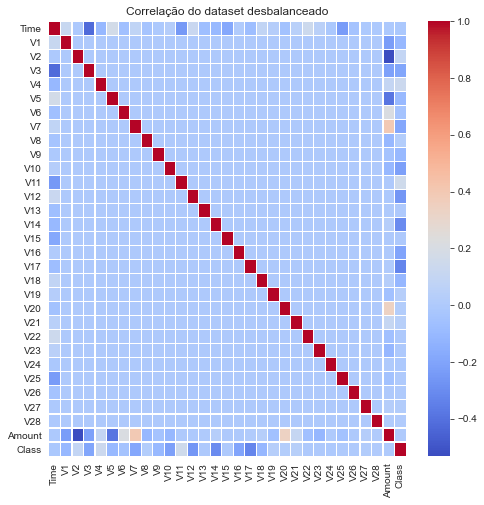

In [ ]:
# Analisando as correlações
plt.subplots(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm', linewidths=.1)
plt.title("Correlação do dataset desbalanceado")
plt.show();

No dataset desbalanceado as correlações parecem ser muito fracas. Veremos mais à frente se isso se sustenta quando balancearmos.

### Distribuição das demais variáveis

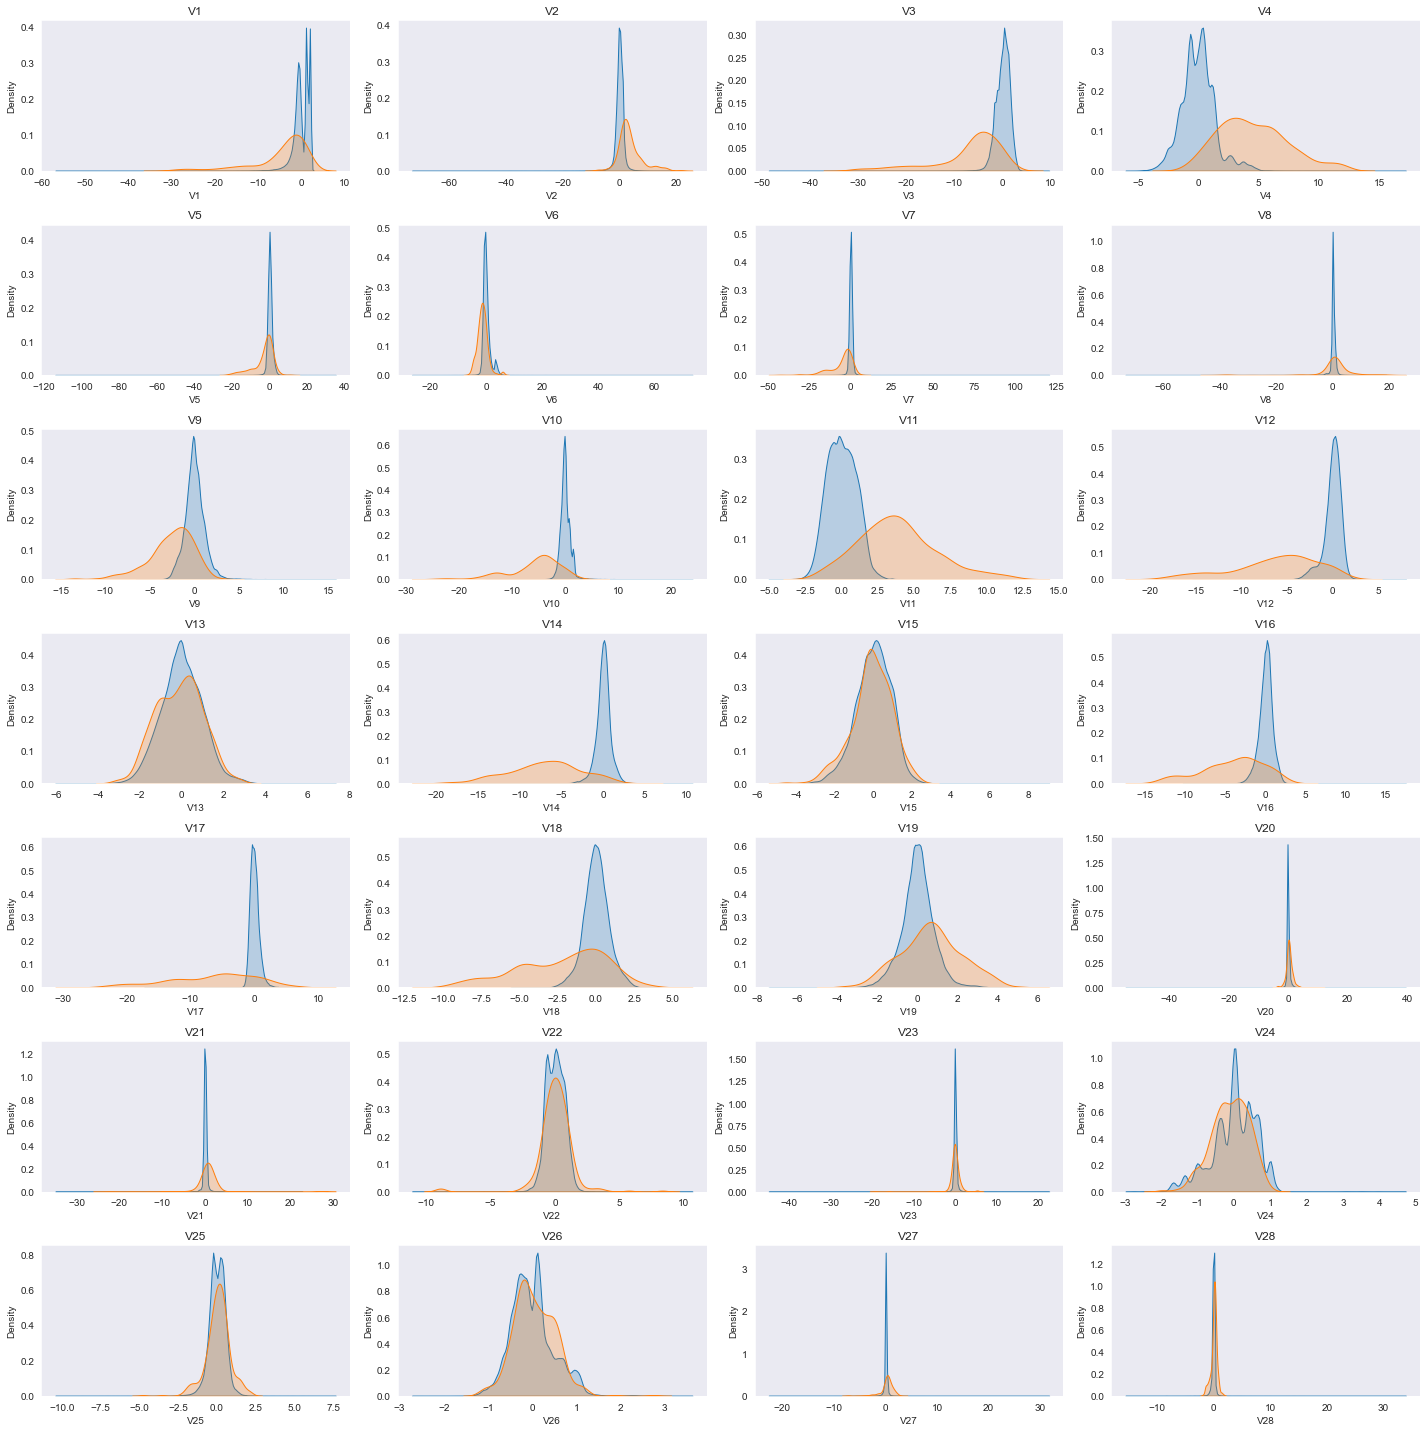

In [ ]:
#Distribuição cumulativa das variáveis

cols = [i for i in list(df.columns) if i not in ['Time','Amount','Class']]

fig, ax = plt.subplots(nrows=7,ncols=4, figsize=[20,20])
fig.subplots_adjust(hspace=1, wspace=1)

for n,i in enumerate(cols):
    plt.subplot(7,4,n+1)
    sns.kdeplot(df[df['Class']== 0][i], label='Classe 0', shade=True)
    sns.kdeplot(df[df['Class']== 1][i],label='Classe 1',  shade=True)
    plt.title(i)
plt.tight_layout()

## Preparação dos Dados

Essa etapa consiste em três passos: divisão do dataset em treino e teste, balanceamento do dataset e padronização das variáveis time e amount.
Essa última etapa optei por incorporar dentro da função que avalia os modelos já que seu custo computacional é baixo.

### Divisão do dataset

In [ ]:
# Divisão entre treino e teste
X = df.drop('Class', axis =1)
y = df.Class
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [ ]:
# A variável de controle continua desbalanceada 
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

### Balanceamento do dataset

Utilizarei três técnicas de balanceamento para verificar qual apresenta melhores resultados

In [ ]:
# Técnica mista
#https://imbalanced-learn.org/stable/combine.html
smote_enn = SMOTEENN(random_state=42)
X_resampled_smote, y_resampled_smote = smote_enn.fit_resample(X_train, y_train)

In [ ]:
# Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

In [ ]:
# OverSampling
ros = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = ros.fit_resample(X_train, y_train)

In [ ]:
# Utilizando uma para verificar o balanceamento
y_resampled_smote.value_counts()

1    190530
0    182755
Name: Class, dtype: int64

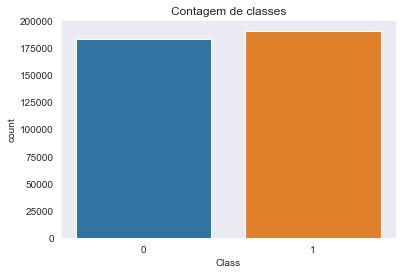

In [ ]:
#Verificando o balanceamento do novo dataset
fig, ax = plt.subplots()
sns.countplot(y_resampled_smote)
ax.set_title("Contagem de classes")
plt.plot();

### Correlações no dataset balanceado

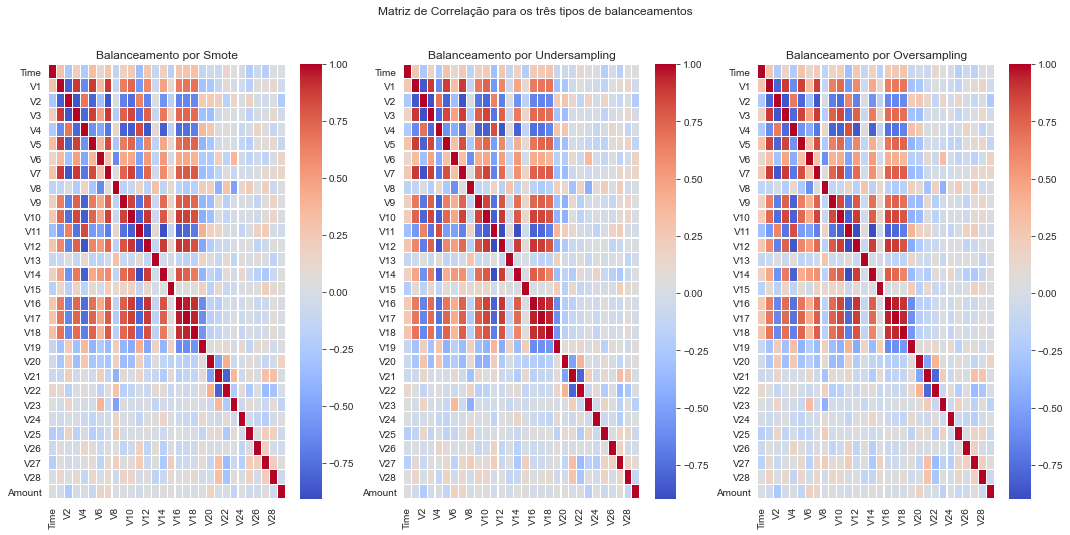

In [ ]:
corr_smote = pd.DataFrame(X_resampled_smote).corr()
corr_under = pd.DataFrame(X_resampled_under).corr()
corr_over = pd.DataFrame(X_resampled_over).corr()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,8))
fig.suptitle('Matriz de Correlação para os três tipos de balanceamentos')

sns.heatmap(corr_smote, linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Balanceamento por Smote')

sns.heatmap(corr_under, linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceamento por Undersampling')



sns.heatmap(corr_over, linewidths=.1, cmap="coolwarm", ax=ax[2])
ax[2].set_title('Balanceamento por Oversampling')

plt.show();

Todos os tipos de balanceamento apresentaram padrões de correlações próximos. Diferem no entando do dataset original - apresentando variáveis com correlações mais fortes entre si.

## Modelos de ML

Para essa etapa optei por criar uma função que utiliza o dataset dividido em treino e teste como entrada. Utiliza um pipeline para standarizar as duas variáveis que necessitamos e retorna diversas estatísticas com os parâmetros base e random state = 42 para os seguintes modelos: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, LinearSVC e Adaboost

In [ ]:
def baseline_ml(X_train, X_test, y_train, y_test):
            
    '''
    Utiliza os dados da divisão de treinamento / teste. Por meio de um pipeline faz a transformação das colunas
    numéricas não standarizadas utilizando o StandardScaler.
    Faz o fit em 5 algoritmos de aprendizado de máquina
    com as configurações padrão e random state = 42: LogisticRegression, DecisionTreeClassifier,
    RandomForestClassifier, LinearSVC e Adaboost.  Para cada um dos modelos imprime os scores : accuracy,  f1-score,
    precision, recall e roc_auc_score, bem como a matriz de confisão.

    Parâmetros:
    X_train - Variáveis de treino
    X_test - Variáveis de teste
    y_train - Variável alvo de treino
    y_test - Variável alvo de teste
    
    
    Retorna - Print dos parâmetros
    '''
    
    
   
    # Initialize four models
    clf_LR = LogisticRegression(random_state=42)
    clf_DT = DecisionTreeClassifier(random_state=42)
    clf_RF = RandomForestClassifier(random_state=42)
    clf_SVC = LinearSVC(random_state=42)
    clf_ADA = AdaBoostClassifier(random_state=42)
    

    #Empty dic for the results
    results = {}

    for clf in [clf_LR, clf_DT, clf_RF, clf_SVC, clf_ADA]:
        model_results = {}
        
        # get the classifier name
        clf_name = clf.__class__.__name__
        
        
        numeric_features = ['Time','Amount']
        numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])


        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features)])

        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor)])



        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features)])

        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classificator', clf)
        ])

        model = pipe.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        
        model_results['accuracy'] = accuracy_score(y_test, y_pred)
        model_results['precision'] = precision_score(y_test, y_pred)
        model_results['recall'] = recall_score(y_test, y_pred)
        model_results['f1'] = f1_score(y_test, y_pred)
        model_results['roc_auc'] = roc_auc_score(y_test, y_pred)
        

        print(clf_name)
        print('Accuracy: ',model_results['accuracy'])
        print('Precision: ',model_results['precision'])
        print('Recall: ',model_results['recall'])
        print('F1: ',model_results['f1'])
        print('Roc_auc: ',model_results['roc_auc'])
        print('')
        skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title = clf_name)
        results[clf_name] = model_results
    
    

LogisticRegression
Accuracy:  0.47511206301276876
Precision:  0.0019609590872626793
Recall:  0.5945945945945946
F1:  0.0039090262970859985
Roc_auc:  0.5347496684796644

DecisionTreeClassifier
Accuracy:  0.9200753718853505
Precision:  0.007663964627855564
Recall:  0.35135135135135137
F1:  0.015000721188518678
Roc_auc:  0.6362067736298347

RandomForestClassifier
Accuracy:  0.9220298912725443
Precision:  0.007857358718646117
Recall:  0.35135135135135137
F1:  0.015370972509606859
Roc_auc:  0.6371857290199514

LinearSVC
Accuracy:  0.4755568039511721
Precision:  0.0019626209911236007
Recall:  0.5945945945945946
F1:  0.0039123282799093054
Roc_auc:  0.5349724247959784

AdaBoostClassifier
Accuracy:  0.709455426424634
Precision:  0.003979899497487437
Recall:  0.668918918918919
F1:  0.007912720297326458
Roc_auc:  0.6892223412227515



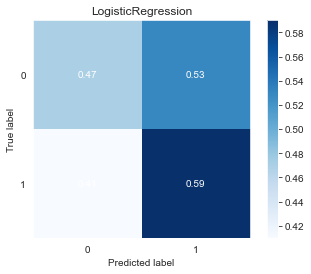

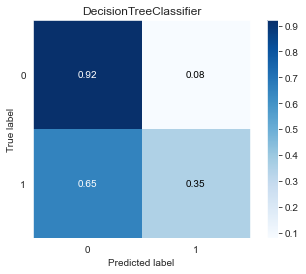

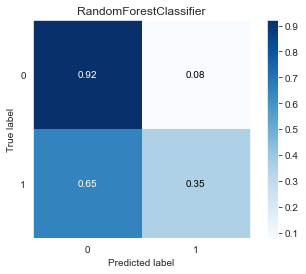

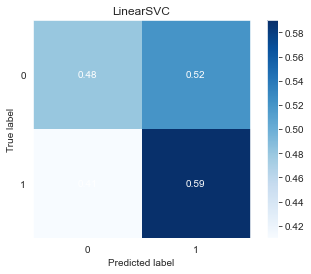

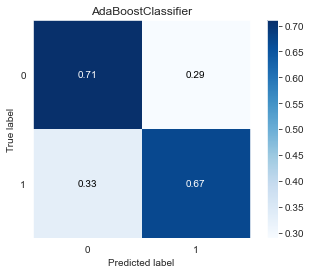

In [ ]:
# Modelo com Smote
baseline_ml(X_resampled_smote, X_test, y_resampled_smote, y_test)

LogisticRegression
Accuracy:  0.5196563791065388
Precision:  0.002045687009887487
Recall:  0.5675675675675675
F1:  0.004076680417374424
Roc_auc:  0.5435704066807883

DecisionTreeClassifier
Accuracy:  0.6616808866729866
Precision:  0.0034874486378232796
Recall:  0.6824324324324325
F1:  0.006939434539145969
Roc_auc:  0.6720386559840806

RandomForestClassifier
Accuracy:  0.7534262607820418
Precision:  0.004781744153015813
Recall:  0.6824324324324325
F1:  0.009496944052656324
Roc_auc:  0.7179909392363228

LinearSVC
Accuracy:  0.518298748873518
Precision:  0.0020399242313856912
Recall:  0.5675675675675675
F1:  0.00406523738082563
Roc_auc:  0.5428904137151983

AdaBoostClassifier
Accuracy:  0.7620284868274756
Precision:  0.004856988667026443
Recall:  0.668918918918919
F1:  0.00964395304661244
Roc_auc:  0.7155544826143923



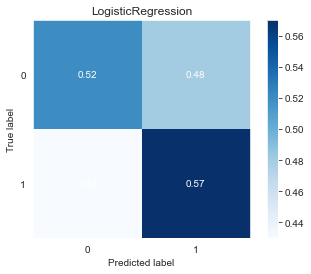

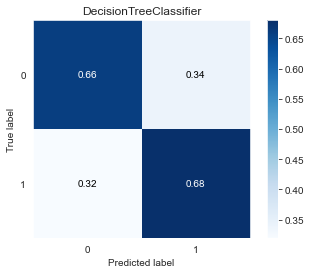

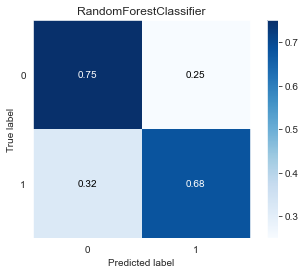

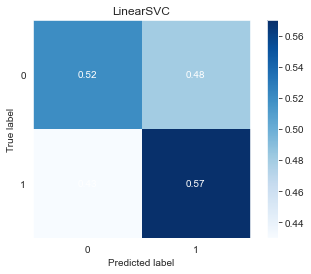

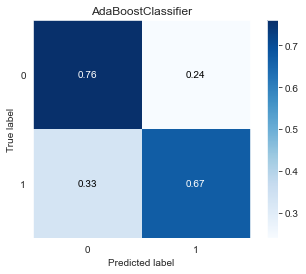

In [ ]:
# Modelo com Undersampling
baseline_ml(X_resampled_under, X_test, y_resampled_under, y_test)

LogisticRegression
Accuracy:  0.5191297122057981
Precision:  0.0020434475880020436
Recall:  0.5675675675675675
F1:  0.004072233668646225
Roc_auc:  0.5433066163062059

DecisionTreeClassifier
Accuracy:  0.9973315543695798
Precision:  0.18253968253968253
Recall:  0.1554054054054054
F1:  0.1678832116788321
Roc_auc:  0.5770989158453254

RandomForestClassifier
Accuracy:  0.9978231101436045
Precision:  0.2682926829268293
Recall:  0.14864864864864866
F1:  0.19130434782608696
Roc_auc:  0.5739726038248812

LinearSVC
Accuracy:  0.5176316374659129
Precision:  0.002037104401600582
Recall:  0.5675675675675675
F1:  0.004059638015610275
Roc_auc:  0.5425562792407274

AdaBoostClassifier
Accuracy:  0.7969172430743302
Precision:  0.005518510002299379
Recall:  0.6486486486486487
F1:  0.01094391244870041
Roc_auc:  0.722911580318228



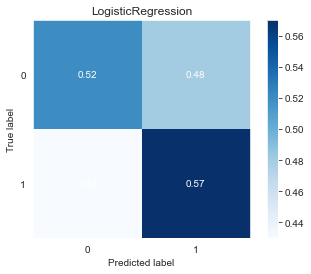

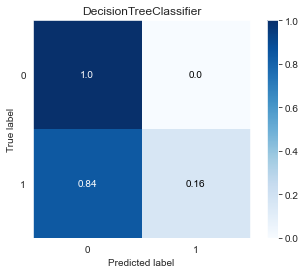

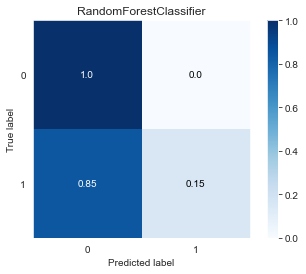

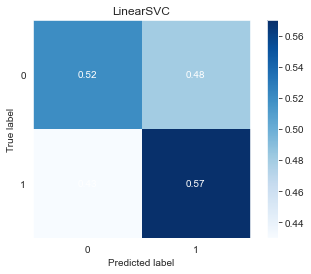

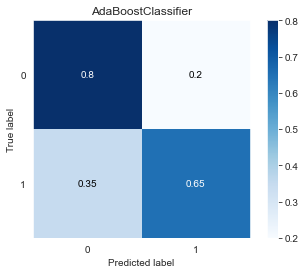

In [ ]:
# Modelo com Oversampling
baseline_ml(X_resampled_over, X_test, y_resampled_over, y_test)

## Avaliação dos modelos

A escolha da métrica de avaliação de um modelo de aprendizado de máquina deve ser atrelada ao problema que se quer atacar.
Por se tratar de uma um projeto de detecção de fraudes, que lesam tanto o cliente quanto as empresas, queremos minimizar a presença de falsos negativos - quando se trata de uma fraude mas classificamos como normal.
Por isso, a métrica principal que levei em conta na escolha dos modelos foi Recall:
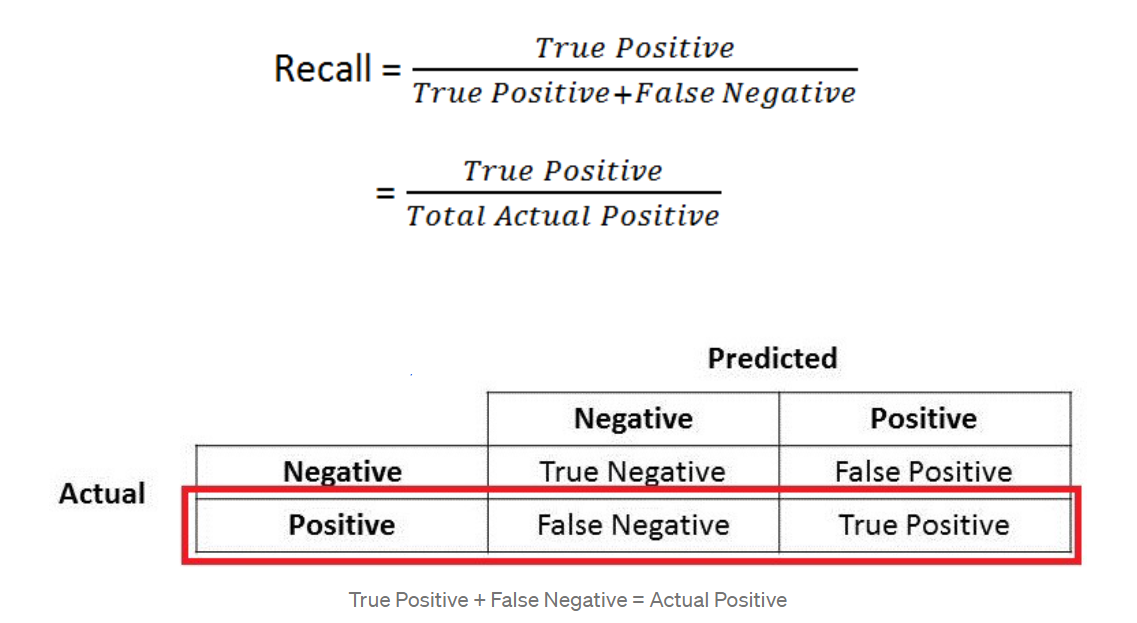


Mas essa não pode ser a única métrica a ser considerada. Caso fosse teríamos como melhor modelo o RandomForest com undersampling com:

| RandomForestClassifier |                      |
|------------------------|----------------------|
| Accuracy:              | 0.7534262607820418   |
| Precision:             | 0.004781744153015813 |
| Recall:                | 0.6824324324324325   |
| F1:                    | 0.009496944052656324 |
| Roc_auc:               | 0.7179909392363228   |


Mas utilizando a mesma técnica de sampling o Adaboost se revela levemente superior em Acurácia:


| AdaBoostClassifier |                      |
|--------------------|----------------------|
| Accuracy:          | 0.7620284868274756   |
| Precision:         | 0.004856988667026443 |
| Recall:            | 0.668918918918919    |
| F1:                | 0.00964395304661244  |
| Roc_auc:           | 0.7155544826143923   |


Ambos os modelos estão muito próximos e deveriam ser levados em consideração ao melhorarmos os hiperparâmetros. Mas o Adaboost aparenta ser menos sensível à variação dos dados ao ser mais estável nas três técnicas de sampling.

## Conclusão

* Mesmo em um dataset previamente trabalhado temos a necessidade de uma análise exploratória minuciosa
* Em datasets desbalanceados um ponto crítico que interfere nos modelos é as escolhas que fazemos de sampling
* Mesmo testando diversos modelos e diversas métricas a conclusão pelo melhor modelo só pode ser feita quando otimizarmos os hiperparâmetros, mas já temos pistas que indicam que Adaboost ou Random Forest podem ser boas escolhas.